In [4]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np

In [21]:
# Load the Diabetes dataset
columns = 'age sex bmi map tc ldl hdl tch ltg glu'.split() # Declare the columns names
diabetes = datasets.load_diabetes() # Call the diabetes dataset from sklearn
df = pd.DataFrame(diabetes.data, columns=columns) # load the dataset as a pandas data frame
y = diabetes.target # define the target variable (dependent variable) as y

In [6]:
diabetes = datasets.load_diabetes()

In [7]:
df.head()

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [8]:
y[:5]

array([151.,  75., 141., 206., 135.])

In [9]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


In [10]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [11]:
predictions[0:5]

array([153.89116909, 174.56983844, 163.23237991, 149.75829281,
       121.1357068 ])

Text(0, 0.5, 'Predictions')

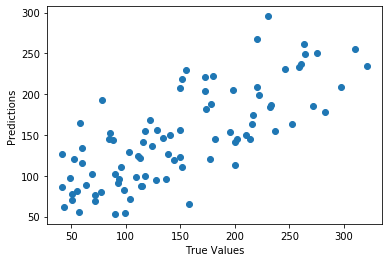

In [12]:
## The line / model
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [13]:
print ('Test RMSE:', np.sqrt(mean_squared_error(predictions, y_test)))
print ('Train RMSE:', np.sqrt(mean_squared_error(lm.predict(X_train), y_train)))

Test RMSE: 48.50927053209764
Train RMSE: 54.84840391898971


# Cross Validation

In [14]:
from sklearn.model_selection import KFold # import KFold
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]]) # create an array
y = np.array([1, 2, 3, 4]) # Create another array
kf = KFold(n_splits=2) # Define the split - into 2 folds 
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator

2

In [15]:
print(kf) 

KFold(n_splits=2, random_state=None, shuffle=False)


In [16]:
for train_index, test_index in kf.split(X):
    print('TRAIN:', train_index, 'TEST:', test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [2 3] TEST: [0 1]
TRAIN: [0 1] TEST: [2 3]


### LOOCV

In [17]:
from sklearn.model_selection import LeaveOneOut 
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]]) # create an array
y = np.array([1, 2, 3, 4]) # Create another array
loo = LeaveOneOut()
loo.get_n_splits(X)


for train_index, test_index in loo.split(X):
    print('TRAIN:', train_index, 'TEST:', test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [1 2 3] TEST: [0]
TRAIN: [0 2 3] TEST: [1]
TRAIN: [0 1 3] TEST: [2]
TRAIN: [0 1 2] TEST: [3]


In [18]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [22]:
# Perform 6-fold cross validation
scores = cross_val_score(model, df, y, cv=6)
print('Cross-validated scores:', scores)

Cross-validated scores: [0.4554861  0.46138572 0.40094084 0.55220736 0.43942775 0.56923406]


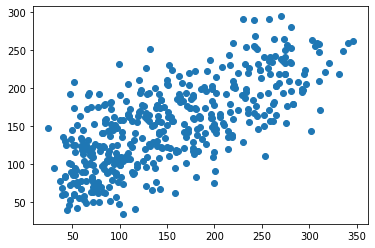

In [23]:
# Make cross validated predictions
predictions = cross_val_predict(model, df, y, cv = 10)
plt.scatter(y, predictions)

In [24]:
np.sqrt(mean_squared_error(y,predictions))

54.76342105528679

# tasks 

##### Find out cross validation results without using cross_val_predict

In [25]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn.metrics import accuracy_score

In [26]:
from typing import Tuple, List

In [27]:
def my_kfold(df: pd.DataFrame, k: int): ### -> List[Tuple(pd.DataFrame, pd.DataFrame)]:
    """
    Custom implementation of KFold
    It takes a dataframe and the number of folds in the input
    And produces k pairs of train and test dataframes
    
    """
    size = df.shape[0]
    test_size = df.shape[0]//k
    kfold_list= []
    for i in range(k):  # iterate over k folds, where i is the index of the fold
        # when i is in [0, k-2]
        first = i * test_size
        if i != k-1:
            second = (i + 1) * test_size
        # when i == k-1
        else:
            second = size
        
        test = df.iloc[first:second,:]
        train = df.drop([df.index[k] for k in range(first, second)])
    
        kfold_list.append((test,train))
    return kfold_list

In [28]:
k=2
my_kfold(df,k)

[(          age       sex       bmi       map        tc       ldl       hdl  \
  0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
  1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
  2    0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
  3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
  4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
  ..        ...       ...       ...       ...       ...       ...       ...   
  216  0.012648  0.050680  0.035829  0.049415  0.053469  0.074155 -0.069172   
  217  0.074401 -0.044642  0.031517  0.101058  0.046589  0.036890  0.015505   
  218 -0.041840 -0.044642 -0.065486 -0.040099 -0.005697  0.014344 -0.043401   
  219 -0.089063 -0.044642 -0.041774 -0.019442 -0.066239 -0.074277  0.008142   
  220  0.023546  0.050680 -0.039618 -0.005671 -0.048351 -0.033255  0.011824   
  
            tch       ltg       glu  
  0   -0.00

In [38]:
scors = []
folds = my_kfold(df,k)

for test,train in folds:
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = lm.fit(X_train,y_train)
    predictions = lm.predict(X_test)
    scors.append(model.score(X_test,y_test))
print(scores)
print(np.mean(scores))

[0.4554861  0.46138572 0.40094084 0.55220736 0.43942775 0.56923406]
0.4797803047530258


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


### Task

##### Implement cross validation without using sklearn at all

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
k = 10
folds = np.array_split(df, k)


In [ ]:
train = []
test = []
cross_val={'train': train, 'test': test}
for i, test in enumerate(folds):
        train.append(folds[:i] + folds[i+1:])
        test.append(test)



In [ ]:
train

In [ ]:
print(cross_val)

# Feature Scaling

In [ ]:
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
  
# Read Data from CSV 
data = pd.read_csv('regression.csv') 
data.head() 
y = data['Value']

In [ ]:
data = data.drop(['Name', 'Nationality', 'Club', 'Wage', 'Position', 'Weight', 'Height', 'Contract Valid Until', 'Value'], axis = 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2)

#### MinMaxScaler

In [ ]:
# Initialise the Scaler and Fit
norm = MinMaxScaler().fit(X_train)

In [ ]:
pd.DataFrame(columns = X_train.columns, data = norm.transform(X_train))

In [ ]:
pd.DataFrame(columns = X_test.columns, data = norm.transform(X_test))

### Standard Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Initialise the Scaler and Fit
norm = StandardScaler().fit(X_train)

In [ ]:
pd.DataFrame(columns = X_train.columns, data = norm.transform(X_train))

In [ ]:
pd.DataFrame(columns = X_test.columns, data = norm.transform(X_test))

# tasks

###### try applying this scalers to any dataset and check the regression results

In [ ]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [ ]:
iris = datasets.load_iris()

X = iris.data
y = iris.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
sc = StandardScaler()

sc.fit(X_train)

X_train_std = sc.transform(X_train)

X_test_std = sc.transform(X_test)

In [ ]:
X_test[0:5]

In [ ]:
X_test_std[0:5]

# One Hot Encoding

In [ ]:
data = pd.read_csv('regression.csv')

In [ ]:
pd.get_dummies(data[['Age', 'Club']])

# tasks

###### try applying this scalers to any column(s) and check the regression results

In [97]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [98]:
columns = 'age sex bmi map tc ldl hdl tch ltg glu'.split() 
diabetes = datasets.load_diabetes() 

df = pd.DataFrame(diabetes.data, columns=columns) 
y = diabetes.target 

In [99]:
diabetes = datasets.load_diabetes()

In [100]:
features = df[columns]

ct = ColumnTransformer([
        ('somename', StandardScaler(), ['age', 'bmi'])
    ], remainder='passthrough')

ct.fit_transform(features)

array([[ 0.80050009,  1.29708846,  0.05068012, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.03956713, -1.08218016, -0.04464164, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 1.79330681,  0.93453324,  0.05068012, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.87686984, -0.33441002,  0.05068012, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.9560041 ,  0.82123474, -0.04464164, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.9560041 , -1.53537419, -0.04464164, ..., -0.03949338,
        -0.00421986,  0.00306441]])